# Imagenette

In [ ]:
#| default_exp imagenette

In [ ]:
#| hide
from nbdev.showdoc import *

In [ ]:
#| export
from typing import Literal

from fastai.vision.all import *

import fastai_datasets.patches

In [ ]:
#| export
_labels = dict(
    n01440764='tench',
    n02102040='English springer',
    n02979186='cassette player',
    n03000684='chain saw',
    n03028079='church',
    n03394916='French horn',
    n03417042='garbage truck',
    n03425413='gas pump',
    n03445777='golf ball',
    n03888257='parachute'
)

def Imagenette(size:Literal[None, 320, 160]):
    url = {None: URLs.IMAGENETTE, 320: URLs.IMAGENETTE_320, 160: URLs.IMAGENETTE_160}[size]
    return DataBlock(
        blocks=(ImageBlock, CategoryBlock),
        get_items=get_image_files,
        get_y=Pipeline([parent_label, _labels.__getitem__]),
        splitter=GrandparentSplitter('train', 'val')
    ).datasets(untar_data(url))

In [ ]:
dsets = Imagenette(size=160)
dsets

[(#9469) [(PILImage mode=RGB size=160x201, TensorCategory(8)),(PILImage mode=RGB size=160x213, TensorCategory(8)),(PILImage mode=RGB size=239x160, TensorCategory(8)),(PILImage mode=RGB size=188x160, TensorCategory(8)),(PILImage mode=RGB size=240x160, TensorCategory(8)),(PILImage mode=RGB size=160x213, TensorCategory(8)),(PILImage mode=RGB size=200x160, TensorCategory(8)),(PILImage mode=RGB size=213x160, TensorCategory(8)),(PILImage mode=RGB size=160x240, TensorCategory(8)),(PILImage mode=RGB size=240x160, TensorCategory(8))...]
(#3925) [(PILImage mode=RGB size=239x160, TensorCategory(8)),(PILImage mode=RGB size=227x160, TensorCategory(8)),(PILImage mode=RGB size=213x160, TensorCategory(8)),(PILImage mode=RGB size=160x240, TensorCategory(8)),(PILImage mode=RGB size=160x232, TensorCategory(8)),(PILImage mode=RGB size=240x160, TensorCategory(8)),(PILImage mode=RGB size=200x160, TensorCategory(8)),(PILImage mode=RGB size=239x160, TensorCategory(8)),(PILImage mode=RGB size=206x160, TensorCa

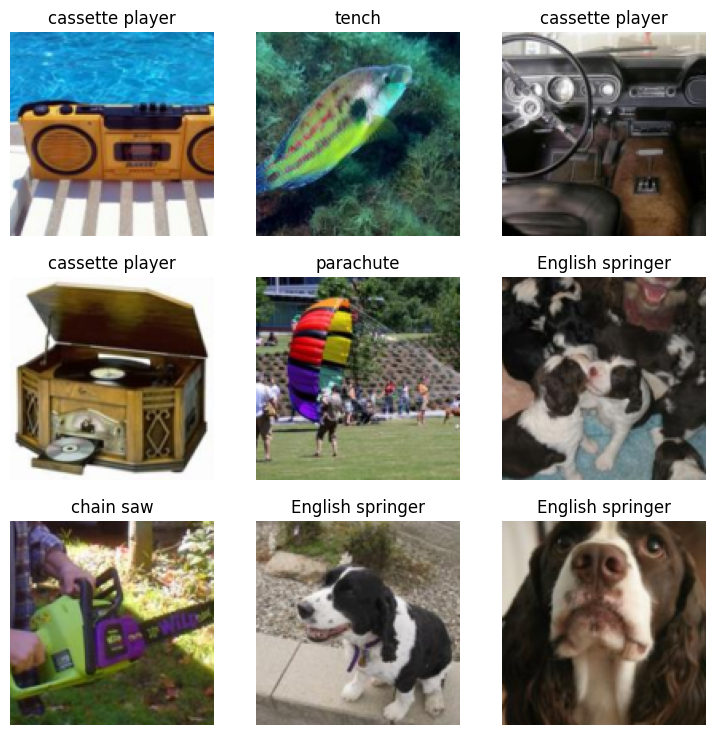

In [ ]:
dsets.dls(after_item=Resize(128)).show_batch()

In [ ]:
#| hide
import nbdev; nbdev.nbdev_export()